<h3><center>Example of MATH and MACHINE LEARNING with Phyton 3 (<b>jupyter</b>)</center></h3>

<h5><center>DATA READING FROM .CSV, LINEAR REGRESION AND SEPARATE DATA TO TRAINING AND TEST SETS EXAMPLES</center></h5>

<p>First of all, you have to run <b>jupyter</b> and open a new note book. The code that you introduce works with libraries that you call.</p>

<p>After, you have to import your .csv file. In this case a .csv with different strenght measures related to age and BMI (Body Mass Index).</p>
<ol> 
    <li>df.head -> lists all the variables.</li> 
    <li>df.head() -> lists first 5 lines.</li>
</ol>

In [1]:
import pandas as pd
filename = "sensor_value.csv"
df = pd.read_csv(filename)

print (df.shape)
print (df.head (5))

(49, 4)
   Unnamed: 0  age    bmi  max strenght
0           1   18  33.77            32
1           2   28  33.00            40
2           4   32  28.88            45
3           5   31  25.74            39
4           6   46  33.44            40


<p>Here´s an example of a maths operation. To calculate the correlation of a variable in relation to the other variables</p>

In [2]:
df.corr()["max strenght"].sort_values()

bmi            -0.209423
Unnamed: 0     -0.144707
age             0.707582
max strenght    1.000000
Name: max strenght, dtype: float64

<p>The next operation is an example of how to make a prediction with the "age" column as the predictive variable, and "max strenght" as the response variable</p>

In [3]:
X= df["age"].values.reshape(-1,1)
y= df["max strenght"].values.reshape(-1, 1)
print("X=",X[0:5],"Y=",y[0:5])

X= [[18]
 [28]
 [32]
 [31]
 [46]] Y= [[32]
 [40]
 [45]
 [39]
 [40]]


<p>Next example is to separate the data into training and test sets using the <b>train_test_split</b> method from the <b><u>sklearn.model_selection_package</u></b> to separate into _X_train,X_test,y_train and y_test_.</p>

<p>We will use the parameter _random_state=1_ to ensure reproducibility and _test_size=0.2_ to define an 80/20 split.</p>


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

print (X_test)
print (y_test)

[[41]
 [45]
 [28]
 [26]
 [32]
 [31]
 [40]
 [36]
 [45]
 [25]]
[[40]
 [50]
 [35]
 [29]
 [45]
 [39]
 [40]
 [36]
 [40]
 [29]]


<p>Now, we´ll build and train a linear regression using <b>"LinearRegresion"</b> from the <u>sklearn.linear_model library</u>, use for training the variables X_train and y_train.</p>

<p>After, we will calculate the error metric $R^2$ (_r2_score_) with the training and test set and printing the obtained error.<


In [5]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,y_train)
y_train_hat = reg.predict(X_train)
y_test_hat = reg.predict(X_test)

In [6]:
from sklearn.metrics import r2_score
print("train", r2_score(y_train, y_train_hat))
print("test", r2_score(y_test, y_test_hat))

train 0.49209401770783867
test 0.5305687334245525


<h5><center>DATA VISUALIZATION EXAMPLES: HEATMAP, GRAPHICS AND PLOTS</center></h5>

<p>Now, using the same .csv file, we will test some visualization examples. In order to do it, we have to import several libraries from ....</p>

<p>As you can see below, it´s a visualization of the correlation calculated before</p>


<AxesSubplot:>

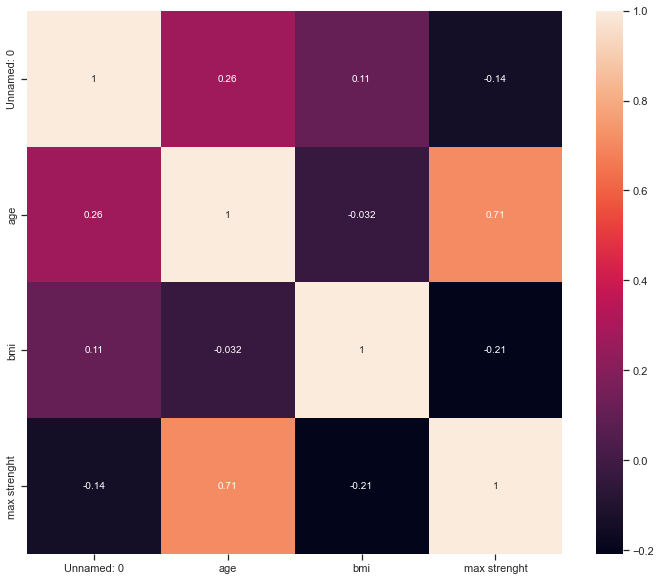

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
%matplotlib inline
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),annot=True)

<p>Here are some plotting examples</p>

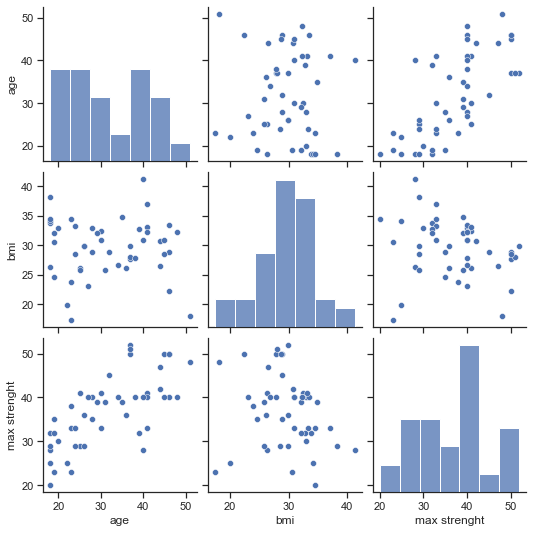

In [8]:
sns.pairplot(df, vars=["age", "bmi","max strenght"])

<h5><center>LINEAR REGRESSION AND ERROR METRICS</center></h5>

In [20]:
df_ = df
df = df.sample(10, random_state=100)

In [21]:
from sklearn.linear_model import LinearRegression
X = df["age"].values.reshape(-1,1)
y = df["max strenght"].values.reshape(-1, 1)

In [22]:
reg = LinearRegression().fit(X,y)
y_hat = reg.predict(X)
print(y_hat)

[[25.29650565]
 [41.28468654]
 [44.83761562]
 [31.51413155]
 [43.94938335]
 [43.06115108]
 [41.28468654]
 [34.17882837]
 [24.40827338]
 [26.18473792]]


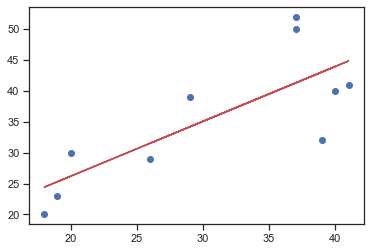

In [23]:
import numpy as  np
plt.scatter(X, y)
plt.plot(X, y_hat,"r-")

<p>Calculating the metric error (R2)</p>
<p>A value of 1 indicates a perfect fit, a value of 0 indicates a model that is equivalent to the mean, a negative value indicates a poor prediction, and accepted values of R2 in real problems range from 0.7 to 0.9.</p>

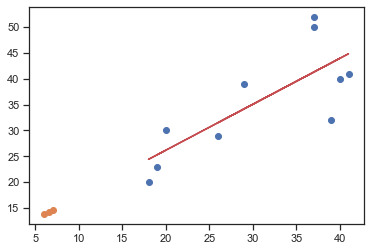

In [24]:
plt.scatter(X, y)
plt.plot(X, y_hat,"r-")
test_points_X = [[6.00],[6.50],[7.00]]
test_points_y = reg.predict(test_points_X)
plt.scatter(test_points_X,test_points_y) #cambiar marcador

<h5><center>POLINOMIAL FEATURES</center></h5>

<p>Here we can move from 2nd degree polynomes to 9 degree polynomes</p>

In [25]:
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

X = df["age"].values.reshape(-1, 1)
y = df["max strenght"].values.reshape(-1, 1)
train_test = False

def plot(degree = 1, show=True):
    global y_hat
    global poly
    global reg
    global x_model
    global X,y
#     global y
#     plt.figure(figsize=(5,5))
    poly = PolynomialFeatures(degree=degree)
    if train_test:
        X = X_train
        y = y_train
    X_ = poly.fit_transform(X)
    reg = LinearRegression().fit(X_,y)
    y_hat = reg.predict(X_)
    plt.scatter(X,y)
    x_model = np.linspace(0,20,num=100)
    y_model = reg.predict(poly.transform(x_model.reshape(-1,1)))
    line, = plt.plot(x_model, y_model,"--r")
    plt.axis([0, 20, 0, 40])
    plt.xlabel("age")
    plt.ylabel("max strenght")
    r2 = r2_score(y,y_hat)
    r2 = "{:.3f}".format(r2)
    plt.text(1, 1, r'$R^2 = '+str(r2)+'$', fontsize=15)
    if show:
        print("R2:",r2)
        test_data = [[5], [7.5],[14]]
        predictions = reg.predict(poly.transform(test_data))
        for _x_,_y_ in zip(test_data,predictions):
            print("With an AGE of ",_x_[0],"a MAX STRENGHT of ","{:.3f}" "is predicted".format(_y_[0]))
        plt.show()

interact(plot,degree=(1,10));

interactive(children=(IntSlider(value=1, description='degree', max=10, min=1), Checkbox(value=True, descriptio…

<h4><center>MACHINE LEARNING: SPLITS</center></h4>

<p>We can use splits to test if the model can predict correctly the data. <b>Splits</b> divides data in training and test sets</p>.

In [26]:
df=df_.sample(20, random_state=100) #recuperando el dataset original
from sklearn.model_selection import train_test_split
X = df["age"].values.reshape(-1,1)
y = df["max strenght"].values.reshape(-1, 1)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=100)

In [19]:
print("df:", df.shape)
print("X:", X.shape)
print("X train:", X_train.shape)
print("X test:", X_test.shape)

df: (20, 4)
X: (20, 1)
X train: (13, 1)
X test: (7, 1)


In [20]:
def plot(degree = 1):
    poly = PolynomialFeatures(degree=degree)
    poly.fit_transform(X_train)

    reg = LinearRegression().fit(poly.transform(X_train),y_train)

    plt.scatter(X_train,y_train)
    plt.scatter(X_test,y_test)

    y_train_hat = reg.predict(poly.transform(X_train))
    y_test_hat = reg.predict(poly.transform(X_test))

    x_model = np.linspace(0,20).reshape((-1,1))
    y_model = reg.predict(poly.transform(x_model))
    plt.plot(x_model,y_model, "r--")
    plt.axis([0, 20, 0, 40])

    print("R2 train:",r2_score(y_train,y_train_hat))
    print("R2 test:",r2_score(y_test,y_test_hat))
    
    plt.show()

interact(plot,degree=(1,10));

interactive(children=(IntSlider(value=1, description='degree', max=10, min=1), Output()), _dom_classes=('widge…